# 08차시: [실습] 국내 주식 데이터 수집 및 기본 분석

## 학습 목표
- pykrx 라이브러리로 실제 KOSPI 데이터 수집
- Pandas로 기본 통계량 확인 및 분석
- 여러 종목 비교 분석 (로그 스케일, 정규화)

## 학습 내용
1. pykrx 라이브러리 소개 및 설치
2. 단일 종목 데이터 수집 (삼성전자)
3. Pandas 기본 통계량 분석
4. 일별 수익률 계산
5. 여러 종목 데이터 수집
6. 로그 스케일 비교
7. 정규화 비교 (최초가=100)
8. 기간 수익률 비교

In [1]:
# 라이브러리 설치
!pip install pykrx -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 7.2 MB/s eta 0:00:00


Korean font ready: NanumGothic


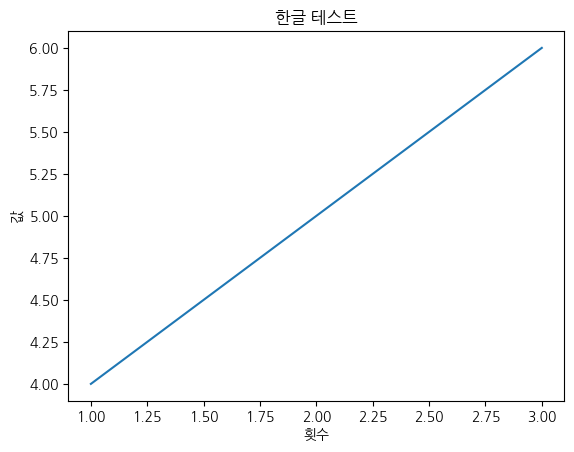

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import gridspec
from datetime import datetime, timedelta

def setup_korean_font_colab(force=False, verbose=True):
    """
    Colab + Matplotlib에서 한글이 깨지지 않도록 하는 통합 함수
    """
    import os
    import matplotlib as mpl
    import matplotlib.font_manager as fm

    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

    if not os.path.exists(font_path):
        !apt-get update -qq
        !apt-get install -y fonts-nanum -qq
        pass

    try:
        fm.fontManager.addfont(font_path)
    except Exception:
        pass

    font_name = fm.FontProperties(fname=font_path).get_name()
    mpl.rcParams["font.family"] = font_name
    mpl.rcParams["axes.unicode_minus"] = False
    mpl.rcParams["pdf.fonttype"] = 42
    mpl.rcParams["ps.fonttype"] = 42

    if verbose:
        print(f"Korean font ready: {font_name}")

    return font_name

setup_korean_font_colab()

# 테스트
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('한글 테스트')
plt.xlabel('횟수')
plt.ylabel('값')
plt.show()

---
## 1. pykrx 라이브러리 소개

### pykrx란?
- 한국거래소(KRX)에서 주가 데이터를 수집하는 파이썬 라이브러리
- 별도의 API 키 없이 무료로 사용 가능
- KOSPI, KOSDAQ, ETF 등 다양한 데이터 제공

### 주요 함수
| 함수 | 설명 |
|------|------|
| `stock.get_market_ohlcv_by_date()` | 특정 종목의 OHLCV 데이터 |
| `stock.get_market_ticker_name()` | 종목코드로 종목명 조회 |
| `stock.get_market_ticker_list()` | 특정 날짜의 종목 리스트 |
| `stock.get_market_cap_by_date()` | 시가총액 데이터 |

---
## 2. 단일 종목 데이터 수집 (삼성전자)

pykrx를 사용하여 삼성전자의 최근 6개월 주가 데이터를 수집합니다.

In [4]:
from pykrx import stock

# 삼성전자 주가 데이터 수집
print("[삼성전자 주가 데이터 수집]")
print("=" * 60)

# 날짜 범위 설정 (최근 6개월)
end_date = datetime.now()
start_date = end_date - timedelta(days=180)

start_str = start_date.strftime('%Y%m%d')
end_str = end_date.strftime('%Y%m%d')

# 삼성전자 종목코드
ticker = "005930"
stock_name = stock.get_market_ticker_name(ticker)

# OHLCV 데이터 수집
df = stock.get_market_ohlcv_by_date(start_str, end_str, ticker)

print(f"종목명: {stock_name}")
print(f"종목코드: {ticker}")
print(f"조회 기간: {start_str} ~ {end_str}")
print(f"데이터 수: {len(df)}개 (거래일 기준)")
print(f"\n컬럼: {df.columns.tolist()}")
print(f"\n처음 5개 데이터:")
df.head()

[삼성전자 주가 데이터 수집]
종목명: 삼성전자
종목코드: 005930
조회 기간: 20250704 ~ 20251231
데이터 수: 121개 (거래일 기준)

컬럼: ['시가', '고가', '저가', '종가', '거래량', '등락률']

처음 5개 데이터:


,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2025-07-04,64700,64700,63000,63300,23748959,-0.783699
2025-07-07,62900,63300,61700,61700,17164708,-2.527646
2025-07-08,61600,62400,61000,61400,20213724,-0.486224
2025-07-09,61400,61400,60200,60400,17533415,-1.628664
2025-07-10,60600,61200,60400,61000,14768473,0.993377


In [5]:
# 데이터 구조 확인
print("[데이터 구조 확인]")
print("=" * 60)
print("\n[df.info()]")
df.info()

print("\n[컬럼별 설명]")
print("  - 시가: 당일 첫 거래 가격")
print("  - 고가: 당일 최고 거래 가격")
print("  - 저가: 당일 최저 거래 가격")
print("  - 종가: 당일 마지막 거래 가격")
print("  - 거래량: 당일 총 거래 주식 수")
print("  - 거래대금: 당일 총 거래 금액 (원)")
print("  - 등락률: 전일 대비 등락률 (%)")

[데이터 구조 확인]

[df.info()]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2025-07-04 to 2025-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      121 non-null    int64  
 1   고가      121 non-null    int64  
 2   저가      121 non-null    int64  
 3   종가      121 non-null    int64  
 4   거래량     121 non-null    int64  
 5   등락률     121 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB

[컬럼별 설명]
  - 시가: 당일 첫 거래 가격
  - 고가: 당일 최고 거래 가격
  - 저가: 당일 최저 거래 가격
  - 종가: 당일 마지막 거래 가격
  - 거래량: 당일 총 거래 주식 수
  - 거래대금: 당일 총 거래 금액 (원)
  - 등락률: 전일 대비 등락률 (%)


---
## 3. Pandas 기본 통계량 분석

`describe()`와 다양한 Pandas 함수를 사용하여 데이터를 분석합니다.

In [6]:
# 기술 통계량 (describe)
print("[기술 통계량 분석]")
print("=" * 60)

print("\n[1] describe() - 전체 통계")
df[['시가', '고가', '저가', '종가', '거래량']].describe().round(0)

[기술 통계량 분석]

[1] describe() - 전체 통계


,시가,고가,저가,종가,거래량
count,121.0,121.0,121.0,121.0,121.0
mean,86386.0,87493.0,85280.0,86457.0,20407956.0
std,16908.0,17280.0,16612.0,16980.0,8115507.0
min,60600.0,61200.0,60200.0,60400.0,8080910.0
25%,70300.0,70900.0,69700.0,70300.0,14712519.0
50%,84900.0,85900.0,83700.0,85400.0,19665151.0
75%,101400.0,102900.0,99900.0,100800.0,23748959.0
max,119400.0,121200.0,118700.0,119900.0,54824564.0


In [7]:
# 주요 통계량 직접 계산
print("\n[2] 주요 통계량]")
print("=" * 60)

print(f"\n[가격 관련]")
print(f"  - 시작가 (첫 날 종가): {df['종가'].iloc[0]:,}원")
print(f"  - 현재가 (마지막 종가): {df['종가'].iloc[-1]:,}원")
print(f"  - 평균가: {df['종가'].mean():,.0f}원")
print(f"  - 중앙값: {df['종가'].median():,.0f}원")

print(f"\n[최고/최저]")
print(f"  - 최고가: {df['종가'].max():,}원 ({df['종가'].idxmax().strftime('%Y-%m-%d')})")
print(f"  - 최저가: {df['종가'].min():,}원 ({df['종가'].idxmin().strftime('%Y-%m-%d')})")
print(f"  - 변동폭: {df['종가'].max() - df['종가'].min():,}원")

print(f"\n[거래량 관련]")
print(f"  - 평균 거래량: {df['거래량'].mean():,.0f}주")
print(f"  - 최대 거래량: {df['거래량'].max():,}주 ({df['거래량'].idxmax().strftime('%Y-%m-%d')})")

print(f"\n[기간 수익률]")
period_return = ((df['종가'].iloc[-1] / df['종가'].iloc[0]) - 1) * 100
print(f"  - 기간 수익률: {period_return:+.2f}%")


[2] 주요 통계량]

[가격 관련]
  - 시작가 (첫 날 종가): 63,300원
  - 현재가 (마지막 종가): 119,900원
  - 평균가: 86,457원
  - 중앙값: 85,400원

[최고/최저]
  - 최고가: 119,900원 (2025-12-30)
  - 최저가: 60,400원 (2025-07-09)
  - 변동폭: 59,500원

[거래량 관련]
  - 평균 거래량: 20,407,956주
  - 최대 거래량: 54,824,564주 (2025-10-31)

[기간 수익률]
  - 기간 수익률: +89.42%


---
## 4. 일별 수익률 계산

`pct_change()`를 사용하여 일별 수익률을 계산하고 분석합니다.

In [8]:
# 일별 수익률 계산
print("[일별 수익률 분석]")
print("=" * 60)

# 수익률 계산 (전일 대비 변화율)
df['수익률'] = df['종가'].pct_change() * 100

print("\n[일별 수익률 통계]")
print(f"  - 평균 일별 수익률: {df['수익률'].mean():.3f}%")
print(f"  - 수익률 표준편차: {df['수익률'].std():.3f}%")
print(f"  - 최대 상승: {df['수익률'].max():.2f}% ({df['수익률'].idxmax().strftime('%Y-%m-%d')})")
print(f"  - 최대 하락: {df['수익률'].min():.2f}% ({df['수익률'].idxmin().strftime('%Y-%m-%d')})")

[일별 수익률 분석]

[일별 수익률 통계]
  - 평균 일별 수익률: 0.561%
  - 수익률 표준편차: 2.365%
  - 최대 상승: 6.83% (2025-07-28)
  - 최대 하락: -5.77% (2025-11-21)



[수익률 분포 히스토그램]


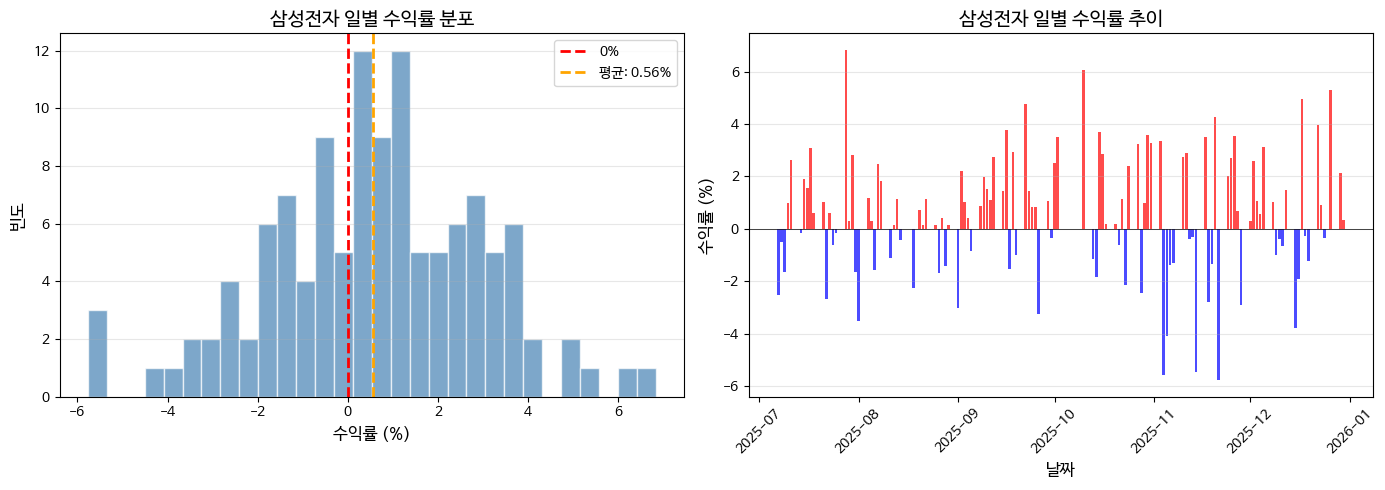

In [9]:
# 수익률 분포 시각화
print("\n[수익률 분포 히스토그램]")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (1) 히스토그램
axes[0].hist(df['수익률'].dropna(), bins=30, color='steelblue', edgecolor='white', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='0%')
axes[0].axvline(x=df['수익률'].mean(), color='orange', linestyle='--', linewidth=2, label=f'평균: {df["수익률"].mean():.2f}%')
axes[0].set_title(f'{stock_name} 일별 수익률 분포', fontsize=14, fontweight='bold')
axes[0].set_xlabel('수익률 (%)', fontsize=12)
axes[0].set_ylabel('빈도', fontsize=12)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# (2) 시계열 수익률
axes[1].bar(df.index, df['수익률'], color=['red' if x >= 0 else 'blue' for x in df['수익률']], alpha=0.7)
axes[1].axhline(y=0, color='black', linewidth=0.5)
axes[1].set_title(f'{stock_name} 일별 수익률 추이', fontsize=14, fontweight='bold')
axes[1].set_xlabel('날짜', fontsize=12)
axes[1].set_ylabel('수익률 (%)', fontsize=12)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
## 5. 여러 종목 데이터 수집

삼성전자, SK하이닉스, NAVER 3개 종목의 데이터를 수집합니다.

In [10]:
# 여러 종목 데이터 수집
print("[여러 종목 데이터 수집]")
print("=" * 60)

# 비교할 종목 리스트
tickers = {
    '005930': '삼성전자',
    '000660': 'SK하이닉스',
    '035420': 'NAVER'
}

# 각 종목 데이터 수집
stocks_data = {}

for ticker, name in tickers.items():
    df_stock = stock.get_market_ohlcv_by_date(start_str, end_str, ticker)
    stocks_data[name] = df_stock
    print(f"  - {name} ({ticker}): {len(df_stock)}개 데이터 수집 완료")

print("\n데이터 수집 완료!")

[여러 종목 데이터 수집]
  - 삼성전자 (005930): 121개 데이터 수집 완료
  - SK하이닉스 (000660): 121개 데이터 수집 완료
  - NAVER (035420): 121개 데이터 수집 완료

데이터 수집 완료!


In [11]:
# 각 종목 현재가 확인
print("\n[각 종목 현재가 및 기간 수익률]")
print("=" * 60)

for name, df_stock in stocks_data.items():
    start_price = df_stock['종가'].iloc[0]
    end_price = df_stock['종가'].iloc[-1]
    return_pct = ((end_price / start_price) - 1) * 100
    print(f"  - {name}: {end_price:,}원 (기간 수익률: {return_pct:+.2f}%)")


[각 종목 현재가 및 기간 수익률]
  - 삼성전자: 119,900원 (기간 수익률: +89.42%)
  - SK하이닉스: 651,000원 (기간 수익률: +140.67%)
  - NAVER: 242,500원 (기간 수익률: -2.61%)


---
## 6. 로그 스케일(Log Scale) 비교

주가 수준이 다른 종목들을 비교할 때 로그 스케일을 사용하면 변동률을 비교하기 쉽습니다.

### 로그 스케일의 특징
- 같은 거리 = 같은 비율 변화
- 예: 10원 → 20원 (100% 상승)과 100원 → 200원 (100% 상승)이 같은 폭으로 표시됨
- 가격 수준이 다른 종목 간 변동률 비교에 유용

[로그 스케일 비교]


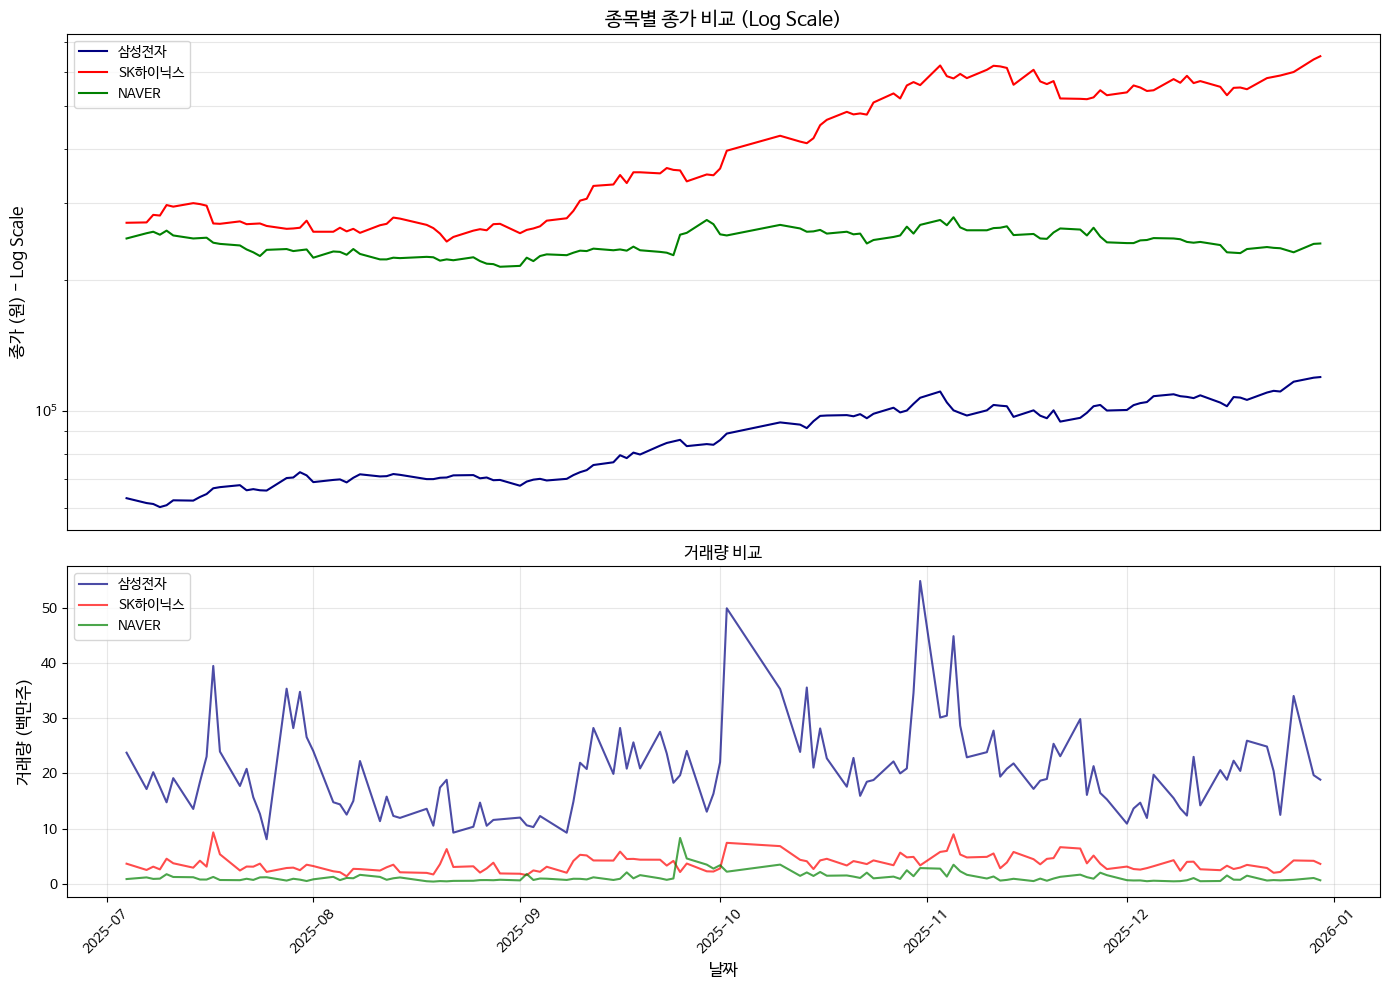

[로그 스케일의 장점]
  - 주가 수준이 다른 종목들의 변동률(%)을 시각적으로 비교 가능
  - 같은 거리 = 같은 비율 변화 (예: 10->20과 100->200이 같은 폭)


In [12]:
# 로그 스케일 비교 차트
print("[로그 스케일 비교]")
print("=" * 60)

fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 2])

axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1]))

# 첫 번째 서브플롯의 x축 숨기기
axes[0].get_xaxis().set_visible(False)

# 색상 설정
colors = ['navy', 'red', 'green']

# 상단: 종가 (로그 스케일)
for i, (name, df_stock) in enumerate(stocks_data.items()):
    axes[0].plot(df_stock.index, df_stock['종가'], label=name, color=colors[i], linewidth=1.5)

axes[0].set_yscale('log')  # 로그 스케일 적용
axes[0].set_title('종목별 종가 비교 (Log Scale)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('종가 (원) - Log Scale', fontsize=12)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3, which='both')

# 하단: 거래량
for i, (name, df_stock) in enumerate(stocks_data.items()):
    axes[1].plot(df_stock.index, df_stock['거래량'] / 1_000_000, label=name, color=colors[i], alpha=0.7)

axes[1].set_title('거래량 비교', fontsize=12, fontweight='bold')
axes[1].set_ylabel('거래량 (백만주)', fontsize=12)
axes[1].set_xlabel('날짜', fontsize=12)
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("[로그 스케일의 장점]")
print("  - 주가 수준이 다른 종목들의 변동률(%)을 시각적으로 비교 가능")
print("  - 같은 거리 = 같은 비율 변화 (예: 10->20과 100->200이 같은 폭)")

---
## 7. 정규화 비교 (최초가 = 100 기준)

서로 다른 가격대의 종목들을 비교하기 위해 시작일의 가격을 100으로 맞춰 상대적 성과를 비교합니다.

### 정규화 공식
```
정규화 가격 = (현재 종가 / 시작일 종가) × 100
```

[정규화 비교: 최초가 = 100 기준]


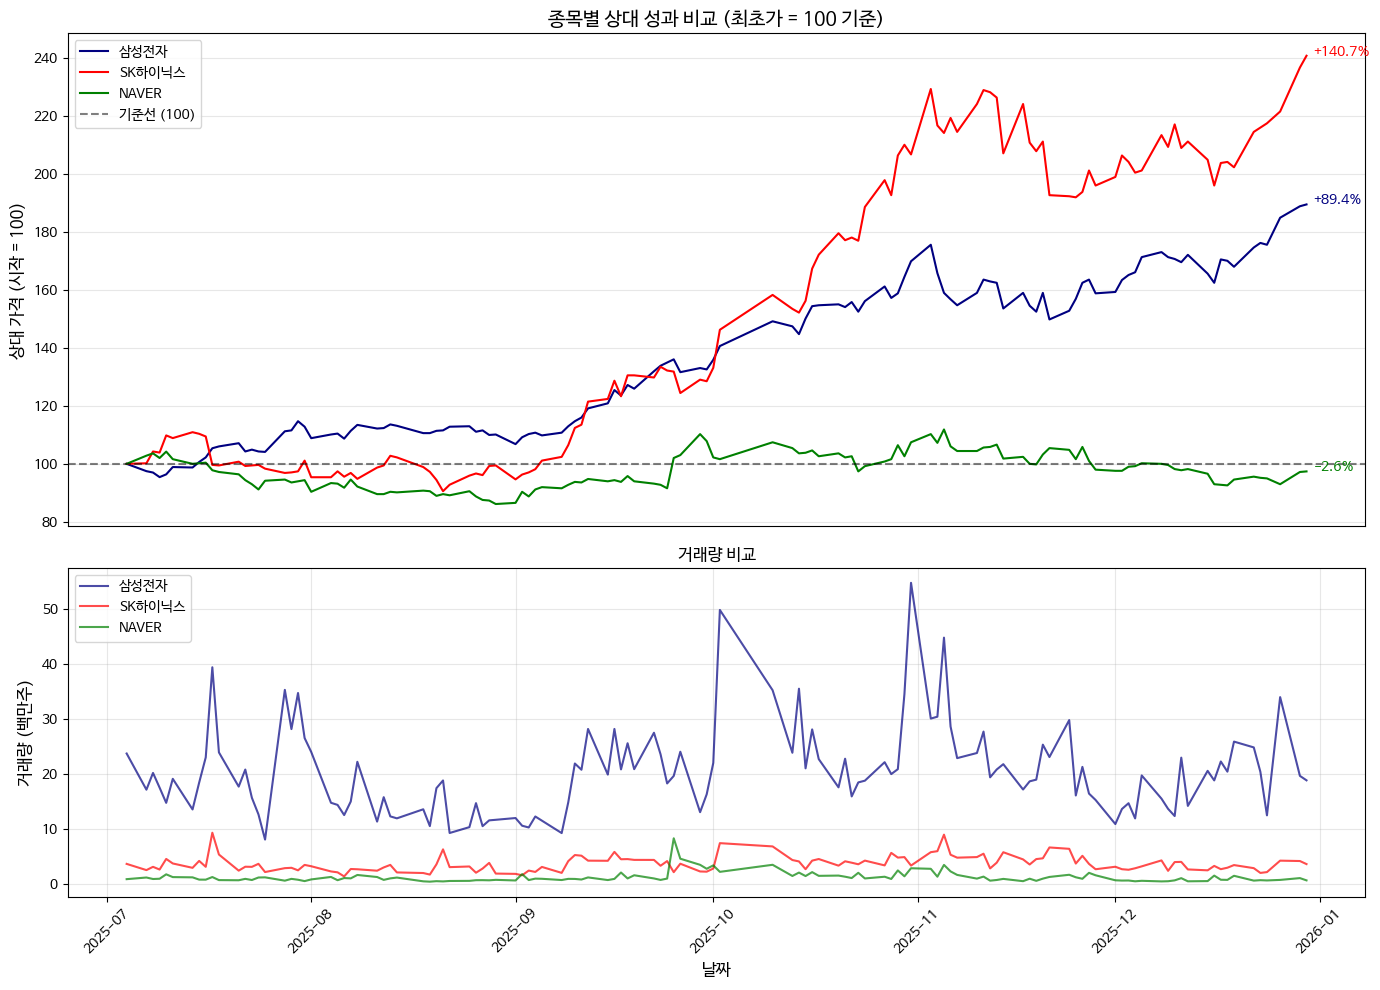

[정규화 비교의 장점]
  - 시작점을 동일하게 맞춰 상대 성과를 직관적으로 비교
  - 100 이상: 수익, 100 미만: 손실


In [13]:
# 정규화 비교 (최초가 = 100)
print("[정규화 비교: 최초가 = 100 기준]")
print("=" * 60)

fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 2])

axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1]))

# 첫 번째 서브플롯의 x축 숨기기
axes[0].get_xaxis().set_visible(False)

# 상단: 정규화된 종가 (최초가 = 100)
for i, (name, df_stock) in enumerate(stocks_data.items()):
    # 정규화: 첫 번째 값을 100으로 설정
    normalized = (df_stock['종가'] / df_stock['종가'].iloc[0]) * 100
    axes[0].plot(df_stock.index, normalized, label=name, color=colors[i], linewidth=1.5)

    # 최종 수익률 표시
    final_return = normalized.iloc[-1] - 100
    axes[0].annotate(f'{final_return:+.1f}%',
                     xy=(df_stock.index[-1], normalized.iloc[-1]),
                     xytext=(5, 0), textcoords='offset points',
                     fontsize=10, color=colors[i], fontweight='bold')

axes[0].axhline(y=100, color='black', linestyle='--', alpha=0.5, label='기준선 (100)')
axes[0].set_title('종목별 상대 성과 비교 (최초가 = 100 기준)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('상대 가격 (시작 = 100)', fontsize=12)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# 하단: 거래량
for i, (name, df_stock) in enumerate(stocks_data.items()):
    axes[1].plot(df_stock.index, df_stock['거래량'] / 1_000_000, label=name, color=colors[i], alpha=0.7)

axes[1].set_title('거래량 비교', fontsize=12, fontweight='bold')
axes[1].set_ylabel('거래량 (백만주)', fontsize=12)
axes[1].set_xlabel('날짜', fontsize=12)
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("[정규화 비교의 장점]")
print("  - 시작점을 동일하게 맞춰 상대 성과를 직관적으로 비교")
print("  - 100 이상: 수익, 100 미만: 손실")

---
## 8. 기간 수익률 비교

각 종목의 기간 수익률을 계산하고 비교합니다.

[기간 수익률 비교]

[기간 수익률 순위]
   종목명     수익률(%)
SK하이닉스 140.665434
  삼성전자  89.415482
 NAVER  -2.610442


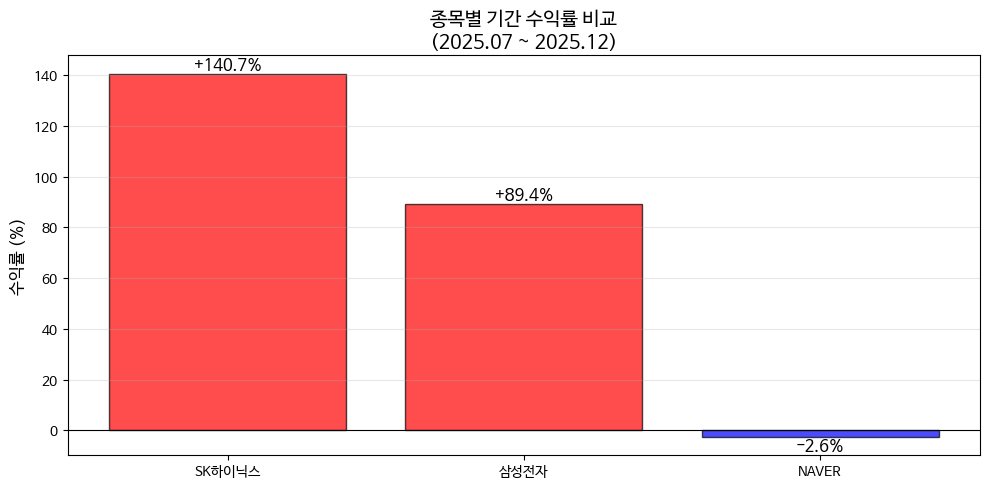

In [14]:
# 기간 수익률 비교
print("[기간 수익률 비교]")
print("=" * 60)

# 수익률 계산
returns = {}
for name, df_stock in stocks_data.items():
    start_price = df_stock['종가'].iloc[0]
    end_price = df_stock['종가'].iloc[-1]
    return_pct = ((end_price / start_price) - 1) * 100
    returns[name] = return_pct

# DataFrame으로 정리
df_returns = pd.DataFrame({
    '종목명': returns.keys(),
    '수익률(%)': returns.values()
}).sort_values('수익률(%)', ascending=False)

print("\n[기간 수익률 순위]")
print(df_returns.to_string(index=False))

# 막대 그래프
plt.figure(figsize=(10, 5))
colors_bar = ['red' if x >= 0 else 'blue' for x in df_returns['수익률(%)']]
bars = plt.bar(df_returns['종목명'], df_returns['수익률(%)'], color=colors_bar, alpha=0.7, edgecolor='black')

# 값 표시
for bar, val in zip(bars, df_returns['수익률(%)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:+.1f}%',
             ha='center', va='bottom' if height >= 0 else 'top',
             fontweight='bold', fontsize=12)

plt.axhline(y=0, color='black', linewidth=0.8)
plt.title(f'종목별 기간 수익률 비교\n({start_str[:4]}.{start_str[4:6]} ~ {end_str[:4]}.{end_str[4:6]})', fontsize=14, fontweight='bold')
plt.ylabel('수익률 (%)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

---
## 학습 정리

### 1. pykrx 데이터 수집
- `stock.get_market_ohlcv_by_date()`: OHLCV 데이터 수집
- `stock.get_market_ticker_name()`: 종목명 조회
- 날짜 형식: `'YYYYMMDD'` (문자열)

### 2. Pandas 통계 분석
- `describe()`: 기술 통계량
- `pct_change()`: 변화율 계산
- `idxmax()`, `idxmin()`: 최대/최소값 인덱스

### 3. 여러 종목 비교
- **로그 스케일**: 가격 수준이 다른 종목의 변동률 비교
- **정규화**: 최초가=100 기준으로 상대 성과 비교

### 핵심 포인트
1. pykrx는 API 키 없이 무료로 사용 가능
2. 로그 스케일: 같은 거리 = 같은 비율 변화
3. 정규화: 시작점을 맞춰 상대 성과 비교

---

### 다음 차시 예고
- 09차시: 이동평균으로 금융 시계열 추세 분석
  - 단순/지수 이동평균
  - 골든크로스, 데드크로스